# Difference-in-Means Testing
# Scenario 2: Truncated normals with substantial overlap

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import json
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), 'scripts'))
from bet_co96 import call_process_co96
from bet_oj23 import call_process_oj23
from bet_ons import call_process_ons
from bet_ftrl_barrier import call_process_ftrl
from bet_optftrl_barrier import call_process_optftrl

from scipy.stats import truncnorm
np.random.seed(100) #reproducible

In [2]:
def sample_truncated_normal(mu, sigma, size):
    # Truncate to [0, 1]
    a, b = (0 - mu) / sigma, (1 - mu) / sigma
    return truncnorm.rvs(a, b, loc=mu, scale=sigma, size=size)

In [3]:
# Scenario 2: Truncated normals with substantial overlap
t     = 1500
iters = 300

# **H1** scenario
y1 = sample_truncated_normal(mu=0.5, sigma=0.15, size= (iters,t) )
y2 = sample_truncated_normal(mu=0.6, sigma=0.15, size= (iters,t) )

# **H0** scenario
z1 = y1[:,:500]
z2 = y2[:,:500] + np.mean(y1[:,:500]) - np.mean(y2[:,:500])

In [4]:
y1 = np.array(y1)
y2 = np.array(y2)
z1 = np.array(z1)
z2 = np.array(z2)

alphas=np.linspace(0.005, 0.1, 20)
output_file='./results/trunc_high_overlap.json'
call_process_ons(y1, y2, z1, z2, alphas, iters, output_file)
call_process_ftrl(y1, y2, z1, z2, alphas, iters, output_file)
call_process_optftrl(y1, y2, z1, z2, alphas, iters, output_file)
call_process_co96(y1, y2, z1, z2, alphas, iters, output_file)
call_process_oj23(y1, y2, z1, z2, alphas, iters, output_file)

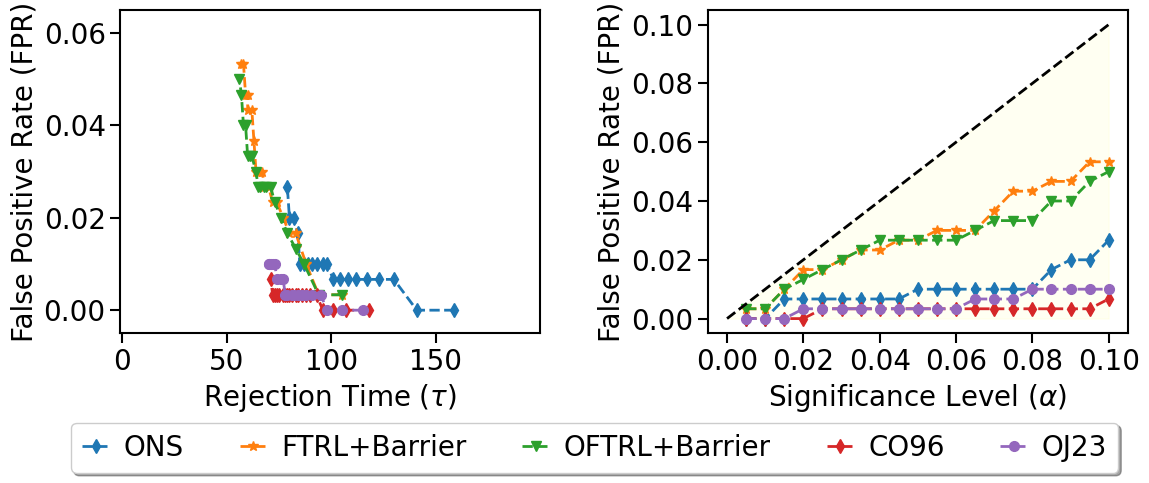

In [8]:
df_list = []

with open('./results/trunc_high_overlap.json', 'r') as file:
    items = json.load(file)


for item in items:
    df = pd.DataFrame({
        'rejection_time': item['rejection_time'],
        'fpr': item['fpr'],
        'name': item['method'], 
        'alpha': np.linspace(0.005, 0.1, len(item['fpr']))  
    })
    df_list.append(df)


fig, ax = plt.subplots(1, 2, figsize=(13, 4.2))  
i = 0
markers = ["d", "*", "v", "d", "o"]

 # Medium Aquamarine, Crimson

for df in df_list:
    ax[0].plot(df['rejection_time'], df['fpr'],ls='--', lw=2,  marker=markers[i], label=df['name'].iloc[0], markersize=7)
    ax[1].plot(df['alpha'], df['fpr'], ls='--', lw=2, marker=markers[i],label=df['name'].iloc[0], markersize=7)
    i += 1

ax[0].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[0].set_ylim(-0.005,0.065)
ax[0].set_yticks(np.arange(0,0.065,0.02))
ax[0].set_xlim(-1,200)
ax[0].set_xticks(np.arange(0,200, 50))
ax[0].set_xlabel(r'Rejection Time ($\tau$)', fontsize=20)
ax[0].set_ylabel('False Positive Rate (FPR)', fontsize=20)
x = np.linspace(0, 0.1, 500)
y = x 
ax[1].fill_between(x, 0, y, color='yellow', alpha=0.05, zorder=1)  
ax[1].set_ylim(-0.005,0.105)
ax[1].set_yticks(np.arange(0,0.105,0.02))
ax[1].set_xlim(-0.005,0.105)
ax[1].set_xticks(np.arange(0,0.105,0.02))
ax[1].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[1].plot([0, 0.1], [0, 0.1], color='k', ls='--',  lw=2)
ax[1].set_xlabel(r'Significance Level ($\alpha$)', fontsize=20)
ax[1].set_ylabel('False Positive Rate (FPR)', fontsize=20)
handles, labels = next(ax.flat).get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.49, -0.07), fancybox=True, shadow=True,
             ncol=5, fontsize=20, labelspacing=0.1, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.4)  
for axis in ax:  
    for spine in axis.spines.values():
        spine.set_linewidth(1.5)  

plt.savefig('./plot_results/trunc_high_overlap.png', dpi=300, bbox_inches='tight')  
